In [36]:
import pandas as pd
import datetime 
import psycopg2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from config import db_password

In [37]:
playlist_df = pd.read_csv('Resources/features.csv', index_col=0)

In [38]:
playlist_df['duration_mins'] = pd.to_datetime(playlist_df['duration_ms'], unit='ms').dt.strftime('%H:%M:%S')

In [39]:
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_mins
0,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.000000,0.2590,0.745,90.031,audio_features,0skYUMpS0AcbpjcGsAbRGj,spotify:track:0skYUMpS0AcbpjcGsAbRGj,https://api.spotify.com/v1/tracks/0skYUMpS0Acb...,https://api.spotify.com/v1/audio-analysis/0skY...,186964,4,00:03:06
1,0.733,0.670,5,-6.009,1,0.0751,0.1210,0.000000,0.1210,0.472,100.964,audio_features,0O6u0VJ46W86TxN9wgyqDj,spotify:track:0O6u0VJ46W86TxN9wgyqDj,https://api.spotify.com/v1/tracks/0O6u0VJ46W86...,https://api.spotify.com/v1/audio-analysis/0O6u...,192841,4,00:03:12
2,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,00:02:47
3,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,audio_features,4h9wh7iOZ0GGn8QVp4RAOB,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB,https://api.spotify.com/v1/tracks/4h9wh7iOZ0GG...,https://api.spotify.com/v1/audio-analysis/4h9w...,148486,4,00:02:28
4,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,00:03:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,0.961,0.557,10,-6.743,0,0.3210,0.0251,0.000000,0.0828,0.742,118.031,audio_features,5hR1PFUnx0uRkqYsW4Z4ja,spotify:track:5hR1PFUnx0uRkqYsW4Z4ja,https://api.spotify.com/v1/tracks/5hR1PFUnx0uR...,https://api.spotify.com/v1/audio-analysis/5hR1...,122266,4,00:02:02
6289,0.530,0.937,0,-2.757,1,0.3210,0.0457,0.000000,0.1510,0.460,92.916,audio_features,6VYBCG9nCZwUUImVqZQVet,spotify:track:6VYBCG9nCZwUUImVqZQVet,https://api.spotify.com/v1/tracks/6VYBCG9nCZwU...,https://api.spotify.com/v1/audio-analysis/6VYB...,176851,4,00:02:56
6290,0.622,0.736,10,-4.917,0,0.1050,0.0626,0.000000,0.1260,0.479,100.498,audio_features,3QB87iPcNT3pNOSqDGQUHG,spotify:track:3QB87iPcNT3pNOSqDGQUHG,https://api.spotify.com/v1/tracks/3QB87iPcNT3p...,https://api.spotify.com/v1/audio-analysis/3QB8...,122141,4,00:02:02
6291,0.798,0.672,10,-5.935,1,0.0677,0.4280,0.000000,0.1170,0.864,127.994,audio_features,3Lf16tRdqj4H7MBtCSztDS,spotify:track:3Lf16tRdqj4H7MBtCSztDS,https://api.spotify.com/v1/tracks/3Lf16tRdqj4H...,https://api.spotify.com/v1/audio-analysis/3Lf1...,206250,4,00:03:26


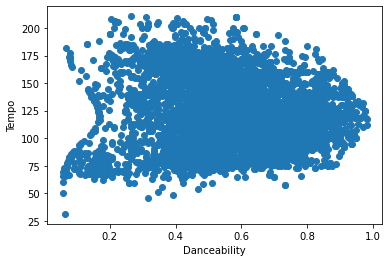

In [40]:
plt.scatter(playlist_df.danceability, playlist_df.tempo)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.show()

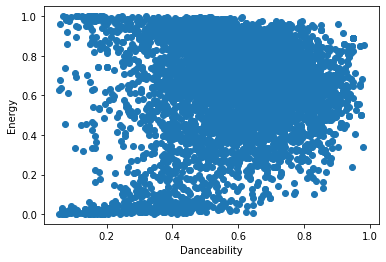

In [41]:
plt.scatter(playlist_df.danceability, playlist_df.energy)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

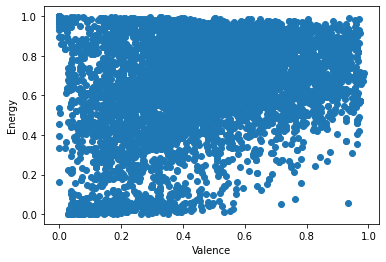

In [42]:
plt.scatter(playlist_df.valence, playlist_df.energy)
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()

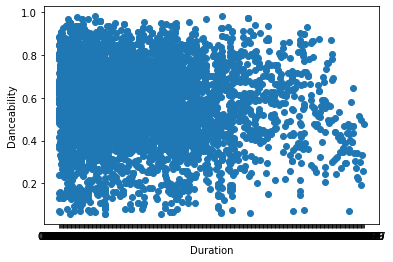

In [43]:
plt.scatter(playlist_df.duration_mins, playlist_df.danceability)
plt.xlabel('Duration')
plt.ylabel('Danceability')
plt.show()

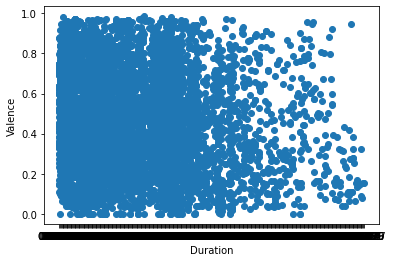

In [44]:
plt.scatter(playlist_df.duration_mins, playlist_df.valence)
plt.xlabel('Duration')
plt.ylabel('Valence')
plt.show()

In [45]:
#establishing the connection
conn = psycopg2.connect(
   database="playlists", user='postgres', password=db_password, host='127.0.0.1', port= '5432'
)

In [46]:
#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [47]:
#Retrieving data
cursor.execute('''
SELECT f.danceability, f.energy, f.key, f.loudness, f.mode, f.speechiness, f.acousticness, f.instrumentalness, f.liveness, f.valence, f.tempo, f.duration_ms, f.time_signature, p.popularity
FROM features AS f
INNER JOIN playlists as p
ON f.uri = p.Song_URI
''')

UndefinedColumn: column p.song_uri does not exist
LINE 5: ON f.uri = p.Song_URI
                   ^


In [ ]:
#Fetching 1st row from the table
result = cursor.fetchone();
print(result)

In [ ]:
#Fetching all rows from the table
result = cursor.fetchall();
print(result)

In [ ]:
machine_learning_df = pd.DataFrame(result)

In [ ]:
machine_learning_df.head()

In [ ]:
machine_learning_df.info()

In [ ]:
#Commit your changes in the database
# conn.commit()

#Closing the connection
conn.close()